# Preparing the data and training the sentiment analyis model

In [12]:
#%run weibodataprocessing.ipynb

In [3]:
from snownlp import SnowNLP
from snownlp import sentiment

from pathlib import Path

import pandas as pd 
import numpy as np
import os

In [33]:
import math
import matplotlib.pyplot as plt

In [13]:
training_set = pd.read_csv('WeiboSentiment2019.csv')

In [14]:
training_set_positive = training_set[training_set['label'].str.contains("__label__positive")]
training_set_negative = training_set[training_set['label'].str.contains("__label__negative")]

In [25]:
positive_truncated = training_set_positive['seged_weibo'].squeeze()
negative_truncated = training_set_negative['seged_weibo'].squeeze()

In [28]:
#positive_truncated.to_csv('custom_pos.txt', sep=' ', index=False)
negative_truncated.to_csv('custom_neg.txt', sep=' ', index=False)

In [6]:
sentiment.train('custom_neg.txt','custom_pos.txt')
sentiment.save('new_custom_sentiment.marshal')

# COVID-19 related tweets sample sentiment analysis

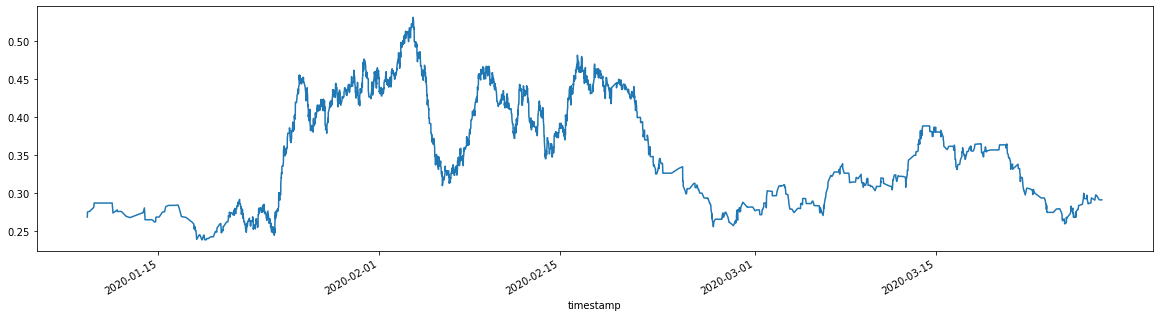

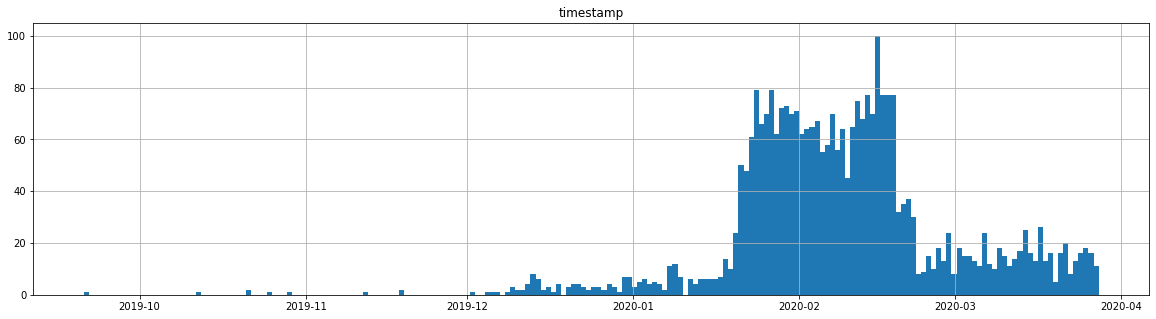

In [143]:
#sample_new_df = new_df.sample(n = 3000)
sample_new_df['sentiment'].rolling(window=150).mean().plot(figsize = (20,5))
sample_hist = sample_new_df.reset_index().hist(column = 'timestamp', figsize = (20,5), bins = 200)

In [61]:
sentiment_column = []

for item, repost in zip(sample_new_df.content, sample_new_df.repost):
    if len(item)>0:    
        s = SnowNLP(item)
        sentiment_column.append(s.sentiments)
    else:
        sentiment_column.append(0)

sample_new_df.loc[:,'sentiment'] = sentiment_column

<AxesSubplot:xlabel='timestamp', ylabel='sentiment'>

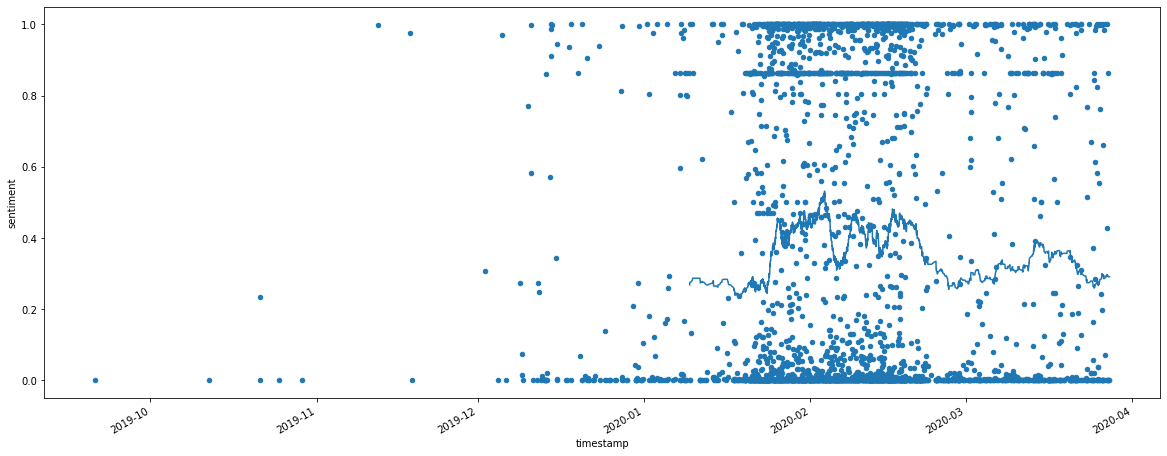

In [141]:
#sample_new_df = sample_new_df.set_index('timestamp')
#sample_new_df = sample_new_df.sort_values(by='timestamp')

sample_new_df.reset_index().plot(kind = 'scatter', x = 'timestamp', y = 'sentiment', figsize = (20,8))
sample_new_df['sentiment'].rolling(window=150).mean().plot()

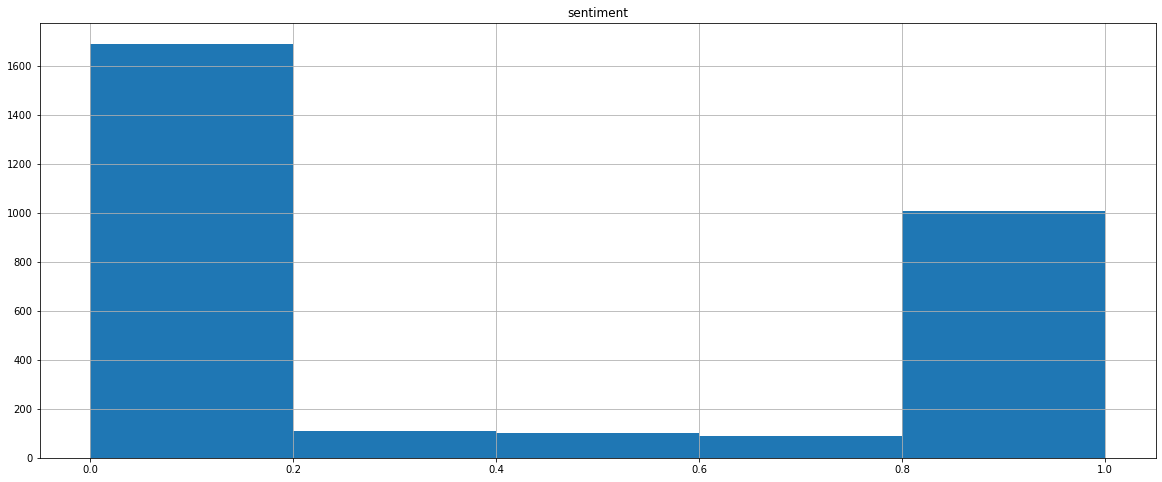

In [66]:
sample_sentiment_hist = sample_new_df.hist(column = 'sentiment', figsize = (20,8), bins = 5)

# SMOA sentiment analysis

In [40]:
sentiment_column = []

for item in smoa_df['content']:
    s = SnowNLP(item)
    sentiment_column.append(s.sentiments)

smoa_df.loc[:,'sentiment'] = sentiment_column

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


### Sentiment of SMOA tweets over time

<AxesSubplot:xlabel='timestamp', ylabel='sentiment'>

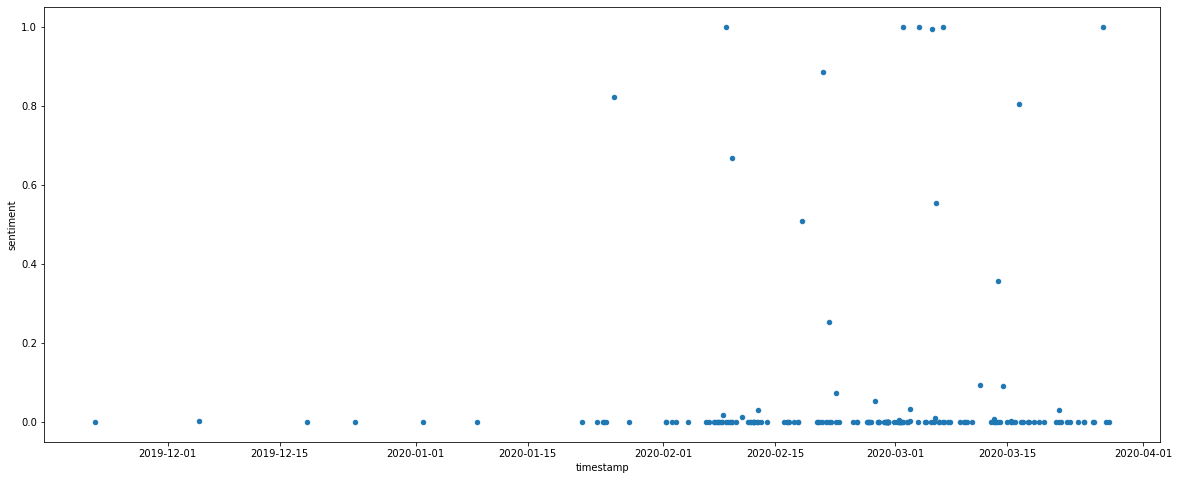

In [78]:
smoa_df.plot.scatter(x = 'timestamp', y = 'sentiment', figsize = (20, 8))

### Analysis of SMOA tweets w/ sentiment > 0.2

In [79]:
good_sentiment = smoa_df.loc[smoa_df['sentiment'] > 0.2]
good_sentiment.head()

,From,content,repost,timestamp,user_id,weibo_id,imgs,sentiment
6977,微博 weibo.com,两个截然不同的风景 2月3日，中国人民正在努力抗击新型冠状病毒疫情的时候，美国巴德学院教授...,NaN,2020-02-21 17:39:00,1106900928,4474460561819567,[//ww4.sinaimg.cn/orj360/006U253Fgy1gc45sfw4uj...,0.252155
11266,荣耀V30 5G,今天是3月6日，疫情来临已经2个月，在疫情来临时，我很钦佩那些医护工作人员，和一直在前线工作...,NaN,2020-03-06 21:58:00,3234725557,4479599028998069,NaN,0.999999
40618,荣耀20,丹麦病夫,{'content': '【#丹麦成欧洲第二个疫情封城国家# 市民超市排长龙抢购纸巾】#关注...,2020-03-13 18:58:00,2695721251,4482090496540735,NaN,0.356950
11584,红米Redmi,李小龙：中国人不是东亚病夫！#李小龙##武汉加油##中国加油！##我和我的祖国##朱一龙我和...,NaN,2020-02-08 19:56:00,2149010964,4469783930135050,[],1.000000
78546,iPhone客户端,哈哈哈哈哈哈哈哈不能做新冠病夫！要为中华之崛起而读书！！//@3775814047://@8...,"{'content': '#武汉小学生太难了#', 'imgs': ['//ww4.sina...",2020-01-25 19:53:00,5524379408,4464709803333808,NaN,0.820903


# Anti-Western sentiment analysis

### Analyzing all tweets mentioning "the West"

In [80]:
western_df = new_df[new_df['content'].str.contains("美国|美方|欧美|中美|西方", regex = True)] 
western_df.head()

,From,content,repost,timestamp,user_id,weibo_id,imgs
565,HUAWEI nova 2 Plus,美国官员提议为武汉肺炎死者默哀 O网页链接,NaN,2020-01-29 16:53:00,4716967295,4466114018928759,NaN
898,微博 weibo.com,3M是一家“百年老店”。在美国淘金热接近尾声的1902年，5个明尼苏达州的年轻人聚在一起看中...,NaN,2020-01-29 18:53:00,4291645174,4466144091693941,NaN
1034,红米Redmi,//@4834532044://@91954949695:这个视频，其实就是针对此次武汉肺炎...,"{'content': '人类必须尊重自然。 O绿洲 L郑克强的微博视频', 'imgs':...",2020-01-29 19:52:00,2476279078,4466158982079086,NaN
1075,OPPO超视野全面屏R15,科普//@4834532044://@91954949695:这个视频，其实就是针对此次武汉...,"{'content': '人类必须尊重自然。 O绿洲 L郑克强的微博视频', 'imgs':...",2020-01-29 19:52:00,5383758259,4466159108223918,NaN
1285,微博 weibo.com,【3万多个来自美国医用口罩经长沙发往武汉】#湖南防控新型肺炎# #同江同湖同舟共济# 今日，...,NaN,2020-01-29 19:54:00,3052034306,4466159409976058,[//ww1.sinaimg.cn/thumb150/b7b53562gy1gbdlu37b...


In [ ]:
for item in antiwestern_df['content']:
    s = SnowNLP(item)
    sentiment_column.append(s.sentiments)

antiwestern_df.loc[:,'sentiment'] = sentiment_column

In [74]:
western_df_sample = western_df.sample(n = 3000)
sentiment_column = []

for item in western_df_sample['content']:
    if len(item) > 0:
        s = SnowNLP(item)
        sentiment_column.append(s.sentiments)
    else:
        sentiment_column.append(0.5)

western_df_sample.loc[:,'sentiment'] = sentiment_column

<AxesSubplot:xlabel='timestamp', ylabel='sentiment'>

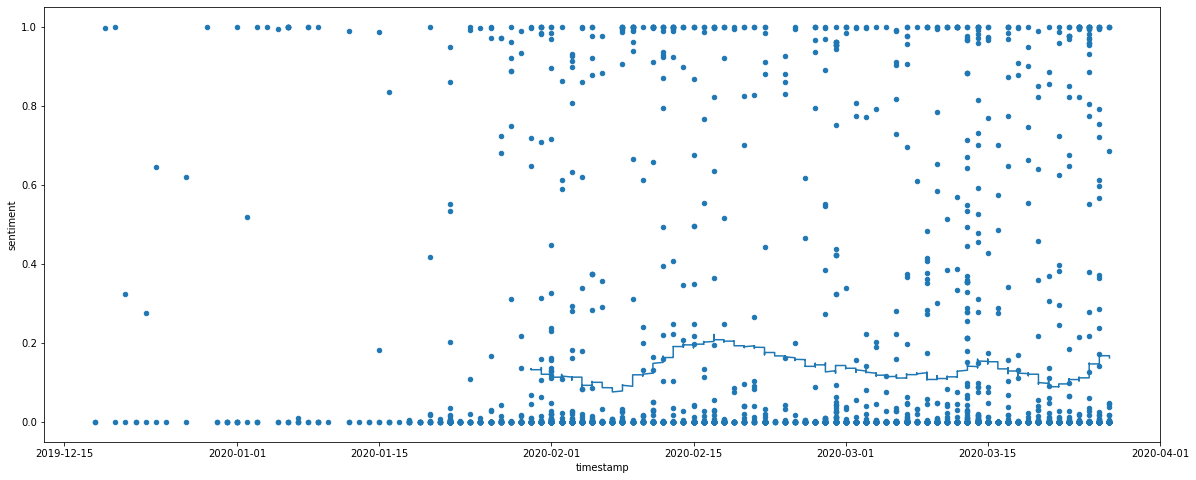

In [122]:
#western_df_sample['timestamp'] = pd.to_datetime(western_df_sample['timestamp']).dt.date
#western_df_sample = western_df_sample.set_index('timestamp')
western_df_sample = western_df_sample.sort_values(by='timestamp')

western_startdate = pd.to_datetime("2019-12-15").date()
western_enddate = pd.to_datetime("2020-03-29").date()
western_df_sample_recent = western_df_sample.loc[western_startdate:western_enddate]

western_df_sample_recent.reset_index().plot(kind = 'scatter', x = 'timestamp', y = 'sentiment', figsize = (20, 8))
western_df_sample_recent['sentiment'].rolling(window=350).mean().plot()

### Anti-Western sentiment over time

<AxesSubplot:xlabel='timestamp', ylabel='sentiment'>

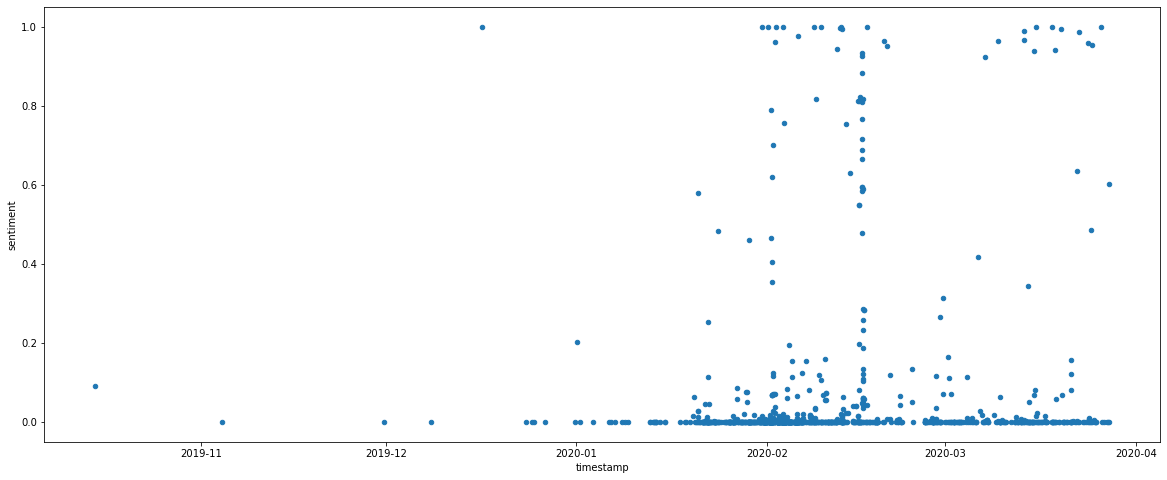

In [47]:
antiwestern_df.plot.scatter(x = 'timestamp', y = 'sentiment', figsize = (20, 8))

### Analysis of anti-Western tweets w/ sentiments > 0.2 and examining sentiment distribution

In [48]:
antiwestern_good_sentiment = antiwestern_df.loc[antiwestern_df['sentiment'] > 0.2]
antiwestern_good_sentiment

,From,content,repost,timestamp,user_id,weibo_id,imgs,sentiment
66314,荣耀8青春版 颜值担当,抗“新冠” ——朋友和诗庚子叩门，三镇遭瘟；中央号令，五岳呼应；总理亲临，南山远征；兰娟坐镇...,NaN,2020-02-03 14:43:00,3254174870,4467893196863277,NaN,0.999997
69313,绿洲APP,#汉服穿搭指南#百变魔法曹😉来根敲魔法牌的锤锤🔨 ～ 大半夜开脑洞，如果新冠病毒是大魔王，我...,NaN,2020-02-13 03:30:00,4548560347,4471347624948922,[//ww4.sinaimg.cn/orj360/006zFHEegy3gbu8ajwb8l...,0.994178
6957,微博国际版,一定是帝国主义的阴谋,{'content': '【#探访武汉肺炎病例出现地#：商户正常营业 防疫人员凌晨消毒】据武...,2020-01-01 01:28:00,7536943326,4455734336570945,NaN,0.202765
32731,小米9,这次的日本，我明白了日本帝国主义和日本人民！希望中日好邻居关系一直走下去！,{'content': '【“英雄般的中国人民一定能战胜疫情！”日本这支著名芭蕾舞团唱响《义...,2020-02-13 20:59:00,9122044956,4471611673396684,NaN,0.754239
55400,360安全浏览器,"#阿里云收购浙大网新#，#疫情仍处于扩散阶段#刘强东性侵案胜诉获百万赔偿,美国女生诬告诈骗失...",NaN,2020-02-15 22:33:00,1999830263,4472360201388842,[//ww1.sinaimg.cn/orj360/739e73cagy1gbxgl2dktc...,0.548000
...,...,...,...,...,...,...,...,...
54953,微博 weibo.com,件事关系太大了，不得不仔细考虑。 而周东飞随即补充，证明了自#德甲#己的思路和当初帝国主...,NaN,2020-03-13 21:05:00,5415011330,4482122343739134,[//ww1.sinaimg.cn/orj360/0079ToDJgy1gcs53hhhg0...,0.965175
96002,Android,【注意这信息量：卫健委三拒美帝】在1月6日，我们向中国提出可以派遣一支疾控小组协助中国的公共...,NaN,2020-01-31 05:16:00,3343398600,4466663359470482,NaN,0.999984
94354,360安全浏览器,"#阿里云收购浙大网新#，#疫情仍处于扩散阶段#刘强东性侵案胜诉获百万赔偿,美国女生诬告诈骗失...",NaN,2020-02-16 11:49:00,1999830263,4472560391386262,[//ww4.sinaimg.cn/orj360/739e73cagy1gby3ki9k80...,0.926389
34437,360安全浏览器,"#阿里云收购浙大网新#，#疫情仍处于扩散阶段#刘强东性侵案胜诉获百万赔偿,美国女生诬告诈骗失...",NaN,2020-02-15 20:51:00,1999830263,4472334549398153,[//ww2.sinaimg.cn/orj360/739e73cagy1gbxdn0zkww...,0.812230


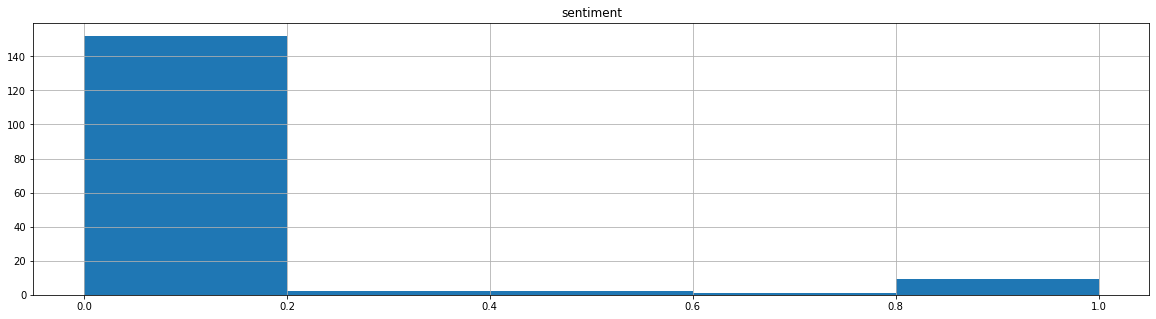

In [51]:
sentiment_hist = smoa_df.hist(column = 'sentiment', figsize = (20, 5), bins = 5)

# COVID Origins Narratives Sentiment Analysis

### Unit 731

In [31]:
unit_731_hot = pd.read_excel('Weibo_731_hot.xlsx')

#unit_731_hot = unit_731_hot.drop(labels=[75, 109, 170], axis = 0)

In [32]:
unit_731_hot = unit_731_hot.set_index('Date')
unit_731_hot = unit_731_hot.sort_values(by='Date')

u731_start = pd.to_datetime("2020-01-01").date()
u731_end = pd.to_datetime("2021-07-10").date()
unit_731_hot = unit_731_hot.loc[u731_start:u731_end]

In [33]:
sentiment_column = []

for item in unit_731_hot['Text']:
    s = SnowNLP(item)
    sentiment_column.append(s.sentiments)
    
unit_731_hot.loc[:,'sentiment'] = sentiment_column

In [51]:
unit_731_hot['sentiment'].mean()
#unit_731_hot.to_excel('unit_731_hot_and_sentiment.xlsx')

0.03657572689339198

<AxesSubplot:xlabel='Date', ylabel='sentiment'>

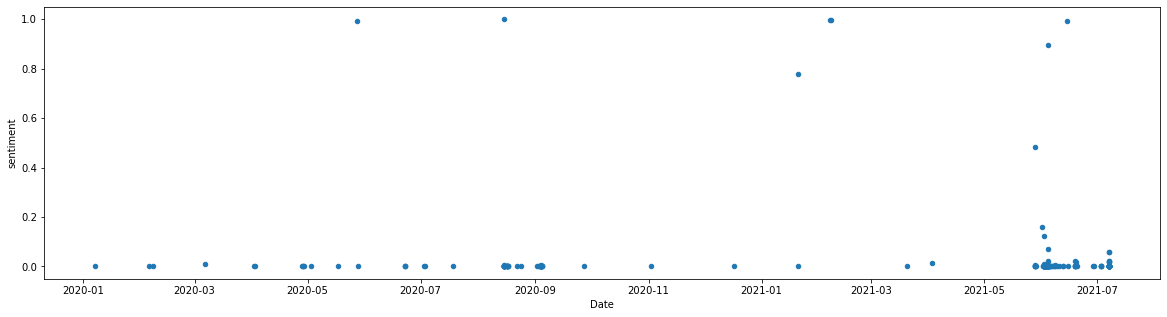

In [35]:
unit_731_hot.reset_index().plot.scatter(x = 'Date', y = 'sentiment', figsize = (20,5))

In [36]:
u731_good_sentiment = unit_731_hot.loc[unit_731_hot['sentiment'] > 0.1]
u731_good_sentiment

,Text,Likes,Author,Shares,sentiment
Date,,,,,
2020-05-27 10:09:00,"【无法描述】我回答了@12位古今历史人物 的问题,大家快来花1元围观~ O微博问答 ​",50.0,孔庆东,30,0.993256
2020-08-14 23:51:00,#美日交易掩盖731部队生物战罪行#是时候给大家展示这本书了……在815的前夜，再合适不过了...,65.0,萧蓝逸,70,0.999597
2021-01-20 20:00:00,NHK纪录片《真实的731部队》完整讨论戳：O网页链接#上虎扑看精彩视频# #731# L虎...,425.0,虎扑的步行街,170,0.777665
2021-02-06 21:40:00,#快看星发现#【#王俊凯新片聚焦日军731部队罪行#】电影《731》正式开机。张家辉、@TF...,213.0,央视网快看,23,0.996058
2021-02-07 11:10:00,#2035问青年#【#王俊凯新片聚焦日军731部队罪行#】电影《731》正式开机。张家辉、@...,365.0,中国青年网,48,0.997710
2021-05-28 18:59:00,#731部队负责人曾是德特里克堡顾问# 美国病毒，真相呼之欲出！美国的三亿狗粮撒哪去了？快出...,56.0,如皋老猫,17,0.483814
2021-06-01 11:49:00,罄 竹 难 书 #731部队做过的恶# ​,1299.0,风闻社区,1157,0.157972
2021-06-02 14:44:00,#731部队做过的恶有哪些# 看有网友转发了RT关于731的纪录片，我也做点儿微末的工作，邀...,279.0,柠檬木聚糖,8,0.121454
2021-06-04 10:54:00,#美德特里克堡基地与731部队曾交易#731部队双重身份意外，牵涉德特里克堡机密，赵立坚剑指...,527.0,圈内小母牛,79,0.897642


### General

In [13]:
origins_hot = pd.read_excel('Weibo_COVID_origins_hot.xlsx')

In [14]:
sentiment_column = []

for item in origins_hot['Text']:
    s = SnowNLP(item)
    print(s.sentiments)
    sentiment_column.append(s.sentiments)
    
origins_hot.loc[:,'sentiment'] = sentiment_column

0.36909091563984486
0.04153225182068909
0.0
0.0
1.978754937681515e-10
0.07707234124756179
0.0
0.06659952789672396
0.0
0.0
0.0
0.059139676438116795
0.1339175343687935
5.786482404346316e-13
0.0
0.0
0.0
7.917661605549853e-05
0.0
0.0
0.0
4.621472988741715e-07
1.7670245378020866e-08
0.7653089545909444
1.4144241333724494e-13
0.0009346601048410008
0.0
4.529909780615071e-11
4.529909780615071e-11
0.9858571189414197
3.819700923446412e-06
4.440892098500626e-16
0.0026627854240979243
9.880984919163893e-14
9.6976245773428e-05
0.8081490999257557
2.6201263381153694e-14
7.555586622132182e-05
0.34626857829674884
1.8003394330889932e-09
5.912132388097291e-07
0.9964809077690544
1.5543122344752192e-15
7.817364078288591e-08
1.4702793815768445e-07
7.170777687959262e-05
7.555586622132182e-05
0.021779875128511095
6.119306261709312e-08
0.9961549009174763
3.4458702558026744e-10
0.0002269529312777241
0.9998574774358253
0.0
2.1538326677728037e-14
0.0
0.0002982364301336027
0.9917421301730632
2.8514248120559138e-05
0

In [53]:
origins_hot['sentiment'].mean()
#origins_hot.to_excel('origins_hot_and_sentiments.xlsx')

0.11766654595801171

<AxesSubplot:xlabel='Date', ylabel='sentiment'>

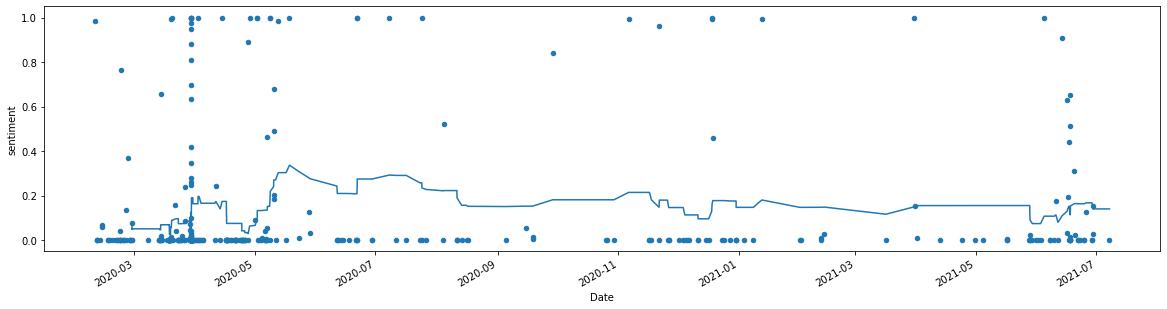

In [20]:
#origins_hot = origins_hot.set_index('Date')
origins_hot = origins_hot.sort_values(by = 'Date')

origins_hot.reset_index().plot.scatter(x = 'Date', y = 'sentiment', figsize = (20,5))
origins_hot['sentiment'].rolling(window=30).mean().plot()

### FD

In [38]:
fd_hot = pd.read_excel('Weibo_FD_hot.xlsx')

In [39]:
sentiment_column = []

for item in fd_hot['Text']:
    s = SnowNLP(item)
    sentiment_column.append(s.sentiments)
    #print(s.sentiments)
    
fd_hot.loc[:,'sentiment'] = sentiment_column

In [55]:
fd_hot['sentiment'].mean()
#fd_hot.to_excel('fd_hot_and_sentiments.xlsx')

0.04551291342984091

In [49]:
fd_good_sentiment = fd_hot.loc[fd_hot['sentiment'] > 0.1]

fd_good_sentiment

,Text,Date,Likes,Author,Shares,sentiment
0,#美国德特里克堡生物实验室暗史#美国黑历史曝光！731部队负责人竟曾是德特里克堡生物武器顾问...,2021-05-30 13:29:00,563,明星娱乐新闻,107,0.143218
3,赵立坚三问美国：美国抗疫不力到底谁应负责？新冠病毒是否早就在美国本土传播？德特里克堡生物实验...,2021-06-21 20:08:00,906,紫光阁,253,0.445921
18,这位网友分析的没错，就是德特里克堡病毒！！！ L网络义勇军伍师的微博视频 ​,2021-05-27 00:15:00,20,网络义勇军伍师,24,0.348405
20,【美国，请回答！#外交部点名德特里克堡基地合集#】自2019年7月，美军德特里克堡生物基地被...,2021-01-22 15:10:00,379,中国日报,67,0.997657
28,美国国家安全顾问Jake Sullivan在21日说：“我们不相信中国已就病毒如何传播、包括...,2021-02-22 17:21:00,365,无心简影,19,0.818673
38,中国外交部：请美方开放德特里克堡基地，请世卫组织去查。L央视网的微博视频 ​,2021-01-19 22:26:00,127,紫金山上听风吟,19,0.988363
48,宽窄观察#德特里克堡病毒# 数一下，有多少只狼🐺？O陈虎：大裂变，这次“他们”真要与中国脱...,2020-04-09 22:09:00,23,布道宽窄,9,0.381959
52,这位网友分析的没错，就是德特里克堡病毒！！！ L网络义勇军伍师的微博视频 ​,2021-05-27 00:15:00,20,网络义勇军伍师,24,0.348405
89,【请回答！#外交部九问美国德特里克堡基地# 】自2019年7月，美军德特里克堡生物基地被调查...,2021-01-21 09:42:00,70,中国警察网,33,0.188775
108,历史天窗你不知道的秘密:德特里克堡生物实验室 L历史天窗的微博视频 ​,2021-01-20 19:55:00,30,历史天窗,15,0.124696


### New General Origin Narratives

In [56]:
new_origins = pd.read_excel('COVID_Origins.xlsx')

In [57]:
sentiment_column = []

for item in new_origins['Text']:
    s = SnowNLP(item)
    sentiment_column.append(s.sentiments)
    print(s.sentiments)
    
new_origins.loc[:,'sentiment'] = sentiment_column

7.515226373255857e-05
0.9999999999975442
1.1546319456101628e-14
0.0
0.0
0.0
0.0036757483333162977
0.0
0.0
0.00832026311059808
0.0
0.0
0.0
0.0
1.3166578938239581e-11
2.193200954181407e-09
2.8659874473646596e-10
0.0
2.8659874473646596e-10
2.8659874473646596e-10
2.8659874473646596e-10
2.8659874473646596e-10
0.00026509341107572304
2.8659874473646596e-10
2.8659874473646596e-10
2.8659874473646596e-10
0.0
0.0
0.00401759503195287
0.01838795642626856
0.0
0.0
1.2325278020419717e-08
0.9997500125631752
0.0
0.0
1.3322676295501878e-15
0.008885360393851238
0.0
2.886579864025407e-15
0.0
0.33107438537457323
3.554663691174298e-06
8.387174377899598e-06
0.0
0.0
0.36852345174301315
0.0
0.005267994492459294
0.0
3.708144902248023e-14
0.0
1.0
0.0
0.0
0.0
1.2962253492787568e-10
0.11755335030926695
0.0
0.00011405991581792119
0.0009976798435584744
0.3641453268452226
4.440892098500626e-16
0.0
0.0
0.9999999716690781
3.719029441850985e-06
8.448553079354326e-09
8.448553079354326e-09
1.1658902621114464e-08
0.0
3.1086

0.9470603089560947
0.7705801393403133
9.932765629994122e-07
0.856213189997903
0.24076155869553428
0.0
0.0
0.0
0.0
0.0
0.0
0.11404050473427119
4.440892098500626e-16
0.0
0.00311237430485356
0.0
0.0
1.68168083025666e-06
0.5674086935162774
1.3688916666865225e-10
2.674971355531852e-12
0.012429696625053221
0.22006572826783788
0.0
4.748271209120691e-05
2.708944180085382e-14
0.04068625542898219
0.19788873800630458
0.0
0.0
0.0
0.0
0.007677427844134277
0.2185707874517081
0.0
0.0
0.0001812293992898839
2.220446049250313e-16
0.0005072901847023026
0.0
0.0
3.291566308405436e-08
6.483702463810914e-14
1.0299247692469038e-06
6.473496602332762e-05
0.0
3.70150199608954e-05
0.557607350059014
0.0
2.788287065469408e-05
0.001733103976524042
0.0
0.11433250701119269
0.0
0.041867677632687395
0.0
0.0
0.011429703683338288
0.003329394179246714
0.036250528133897064
3.695074919374264e-07
0.0
1.587998558871817e-06
0.9932909700970626
0.00035149384412003215
0.0
0.00023154304384320756
0.02031651166955739
0.0
0.0
0.0
0.0


3.019806626980426e-14
1.243212451873532e-07
0.0781833489563486
2.4935609133081016e-13
0.26719506246856217
0.4075248720052318
0.0
2.2130586252444573e-10
4.184771418280775e-08
1.243212451873532e-07
1.2589929099249275e-13
0.0
1.0
2.2130586252444573e-10
0.023506583731403574
0.08611246995185129
1.1622103279762541e-10
0.0031736697460876817
0.47929048370501315
1.8996900330581212e-07
4.853895063661184e-13
0.0
0.0028197895830495145
0.01215223254580966
0.10126174047490755
4.413870677610898e-05
0.0
0.01870165384215705
0.0
8.179680621722696e-07
8.179680621722696e-07
3.2964537856616793e-05
9.459260740252162e-07
1.6209256159527285e-14
0.0
0.0
0.0
0.08645144559496187
0.0
0.00381630781617448
4.035803247148806e-09
0.0029720438828666484
0.0
0.0
1.4551591570821643e-05
0.02782495451678013
0.0
7.392747741030714e-05
7.392747741030714e-05
0.00011296043479891438
0.0
0.19390147946657055
0.0003582557812825682
5.5493057640410015e-05
2.0888471938595998e-05
0.0029720438828666484
0.0003582557812825682
7.49178497017

0.9384643015308621
0.09996943846134754
0.0
0.0
0.09996943846134754
0.0
0.0
0.0
0.0
0.004600536530931287
0.09996943846134754
0.6137252230162157
0.005267994492459294
9.304879425187096e-06
0.09996943846134754
6.588122072215263e-06
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
6.5636173542937826e-06
0.986597599225711
0.014048266141575949
0.6708332503129055
0.0003385565457085793
2.220446049250313e-16
1.4825635386017666e-08
5.0183616718268986e-05
0.0
0.0
0.0
0.0
0.0
7.438517529767541e-05
0.949798889887341
0.9094072402333491
0.0014773050543069877
0.0
0.9997644705555283
0.0
0.0014773050543069877
0.0
0.0
0.0
5.9330710878824355e-05
0.0034545901663239897
0.0034545901663239897
1.8122932043951323e-09
1.521832593720518e-06
0.0
2.5957927596298447e-07
3.642904781708811e-05
0.030095924959927856
0.0
0.5499473050106777
0.0
7.862754891618806e-11
5.402010446697858e-05
0.0
3.3151259515307174e-13
0.0
1.3322676295501878e-15
4.156846422631588e-09
4.084223232947437e-07
0.0
0.006271381686539512
0.0
0.1224554088102966
0.00

0.0
0.0
3.531479132035109e-05
0.001124508800613211
5.110966320942545e-05
5.440827358427214e-06
0.000533936162497306
5.110966320942545e-05
7.580602812140569e-13
5.110966320942545e-05
6.790281240576235e-05
0.0
0.0
2.5227983372344553e-06
0.0
0.0
2.5227983372344553e-06
0.0
0.0
2.5227983372344553e-06
2.5227983372344553e-06
2.5227983372344553e-06
0.0
8.730572362125599e-05
0.0
0.0
0.0
8.730572362125599e-05
0.0
0.6088882724837635
5.46113290367245e-07
0.0
5.87916049177295e-09
0.331133868335143
0.0
3.973155138226048e-11
6.754596881819452e-13
0.03861611010171773
0.0
0.9999412032636076
4.528799557590446e-09
7.420730696594546e-13
0.058350626428611885
2.576955842048534e-07
0.0
0.9918993018296852
0.9878879741705904
0.9999995531530332
0.0
0.5504458882068649
0.5504458882068649
0.5504458882068649
0.029813924878858478
2.0076498693510914e-06
0.48339590941110033
0.48339590941110033
2.7172526451124668e-09
0.18603386372735475
0.23698425105493626
4.095013217408905e-11
0.3242179267433767
9.654379518053702e-10


0.0
1.4910021173264454e-06
0.0
0.0
0.0
0.0
1.2656542480726785e-14
0.0
2.539444743376862e-08
7.614656606369508e-07
0.46620214843116337
0.0
0.9534634499115683
0.0
0.0
0.0
0.46620214843116337
0.0
0.9999999999997757
0.0
0.0
0.0
0.0
0.0
0.0
0.0
2.5682345139443896e-11
0.0
0.0
0.0
0.0
0.0
3.630429290524262e-13
0.7861986431483259
2.5682345139443896e-11
0.0
0.0
0.0002339207788953912
3.745892485085278e-13
2.5682345139443896e-11
0.9999998737071307
1.5709655798445965e-12
1.9721602307454233e-05
0.0
0.1972787994596401
5.599027907976506e-10
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.006479040322271756
0.0
0.0
0.9084831186536368
0.0
5.424549698318515e-13
0.23642720871967304
1.5054149260507188e-08
4.91786377110337e-06
7.7982065249671e-13
1.3427984250080627e-06
2.213784711102562e-12
0.3251431754153904
5.137432701474154e-09
1.3427984250080627e-06
1.7763568394002505e-15
0.0
0.0
0.0
0.1907706528890598
0.9544728064637263
0.9544728064637263
0.9471375819652783
0.9544728064637263
0.004172268

0.0
5.04488716357443e-08
0.0
0.018393975675285557
0.0
0.0
0.0024995550906189434
0.8693478797618304
1.3655743202889425e-11
0.0
0.018393975675285557
0.12252209473625009
0.5975707376947376
0.018393975675285557
0.0
0.0
0.0
2.9780480081953442e-08
2.307890219699349e-05
0.9992679117801703
0.2309185579557883
2.48800773317015e-08
1.8235625314222403e-06
0.023117863753835177
7.105427357601002e-15
0.0011040485031581504
4.937697096152327e-05
0.0
0.6301038848579374
0.0
2.9487071329104e-07
1.9039911347551453e-07
7.249096772854458e-07
0.9917178312583721
0.9999999627691967
0.9999953624744649
0.9987592189552591
0.0041084166333941186
0.0002877470427335993
0.018393975675285557
2.721976796182801e-07
0.0041084166333941186
0.9999999999786284
1.1330912208507016e-07
0.0
0.0
0.9987162681279926
0.0
0.5697053319483689
0.9614041188681791
0.9614041188681791
0.9614041188681791
0.999618733782423
0.984053512979219
0.9987855026569252
0.9815458729362039
0.984053512979219
0.0
4.3135352245649017e-07
5.129230373768223e-14


2.8265900731128113e-10
0.13126967527038957
0.9650069404341547
9.915864441101263e-06
0.0
0.0
0.0
0.0
5.329070518200751e-15
3.8191672047105385e-14
4.461456813875664e-06
0.0
0.003937297736726575
0.0
0.0
0.0
0.0
0.0
0.0
0.018981070252922283
0.9037758683217181
0.0
1.7763568394002505e-14
0.0018000839759375609
0.00039786823637100177
0.0
0.0
0.0
0.0
0.0
0.018981070252922283
2.6645352591003757e-15
0.0
0.003937297736726575
2.7830996507383077e-08
0.0
0.0
0.0
1.2968110296718294e-06
0.01733735070393594
0.0
0.0
0.0
8.737295331684436e-10
0.5565919421652403
1.9310849778131356e-06
8.737295331684436e-10
0.0
8.737295331684436e-10
8.737295331684436e-10
8.737295331684436e-10
8.737295331684436e-10
0.0
3.99967059472317e-09
0.058081923081740316
0.003937297736726575
0.0
0.0
0.0
0.05274471914049439
0.0
0.0
7.771561172376096e-15
0.0
0.0
0.0
1.7382881195571187e-06
0.0
0.016321709708000953
0.0007912969089232114
2.7332802687851654e-11
0.003937297736726575
1.4737810971610088e-10
0.003937297736726575
0.0
0.3098627934

In [58]:
new_origins['sentiment'].mean()

0.12180372998147339

In [121]:
origins_cleaned['sentiment'].mean()

0.1057742691566018

In [91]:
new_origins_good_sentiment = new_origins[new_origins['sentiment'] > 0.5]

for item in new_origins_good_sentiment['Text']:
    print(item)

奥泰特钢 1月1日简报，星期五，农历十一月十八1.国家卫健委副主任曾益新：新冠病毒疫苗全民免费。2.不超过88名！中国工程院2021年院士增选启动。3.2020年油价以“四连涨”收官，加满一箱油多花3.5元。4.嫦娥五号轨道器开展拓展试验，将飞往放置太阳观测站的最佳位置拉格朗日L1点。5.国内首列！ ​ 奥泰特钢 1月1日简报，星期五，农历十一月十八1.国家卫健委副主任曾益新：新冠病毒疫苗全民免费。2.不超过88名！中国工程院2021年院士增选启动。3.2020年油价以“四连涨”收官，加满一箱油多花3.5元。4.嫦娥五号轨道器开展拓展试验，将飞往放置太阳观测站的最佳位置拉格朗日L1点。5.国内首列！自动驾驶有轨电车在江苏淮安试跑成功。6.中央气象台：寒潮趋于结束，元旦假期中东部气温仍偏低。7.2020年财富暴涨709亿美元，农夫山泉董事长钟睒睒成亚洲首富。8.“12393”——全国首个医疗保障服务热线省级平台即将在贵州启用。9.清华新推出丘成桐“数学领军计划”,面向全球招收优秀中学生。10.全国首位！秦岭大熊猫野外种群达345只，栖息地扩大1100多公顷。11.福奇：通过接种疫苗，预期美国2021年秋大体恢复正常。12.也门亚丁机场爆炸死亡人数升至26人，超50人受伤。源头库存商美标4140预硬板料12–120mm;可以开规格料，大板开条；42CrMo板4—300mm可以开规格料，数控异型切割，大板开条；光板精板加工。42CrMo/4140园16-50040Cr板10-80A2铣光板20–70可能没有第二家规格有我齐全电话/微信：18688669368 www.dgotai.com奥泰特殊钢材 心语一无所知的世界，走下去才有惊喜。心有所期，全力以赴，定有所成。  
美国人不怕死系列！熊猫哥在向你招手 大连疫情源头初步判定为俄罗斯籍货轮 关注新冠肺炎数百人未戴口罩参加特朗普跨年派对 特朗普本人临时缺席12月31日，特朗普在美国佛罗里达州海湖庄园（Mar-A-Lago）举办跨年庆典派对，他的两个已成年的儿子、私人律师朱利安尼等数百名重要人士参加，现场人声鼎沸，几乎没有人戴口罩。而原本应该出席的特朗普，却在派对即将开始前返回了华盛顿特区 ​ 数百人未戴口罩参加特朗普跨年派对 特朗普本人临时缺席12月31日，特朗普在美国佛罗里达州海湖庄园（Mar-A-Lago）举办跨年庆典

##### Removing Spam

In [97]:
#云财经|母老虎|防渗膜|航空摄影原创|土工膜|木质物|奥泰特钢|Arsham|肌肤|培养理论|招贤纳士|亳州中药|麦当劳与亚马逊|冷触美容|君实生物|单位面试真题|原油期货|螺蛳粉|南平铝业|
not_relevant_phrases = ['云财经','母老虎','防渗膜','航空摄影原创','土工膜','木质物','奥泰特钢','Arsham','肌肤','培养理论','招贤纳士','亳州中药','麦当劳与亚马逊','冷触美容','君实生物','单位面试真题','原油期货','螺蛳粉','南平铝业']

not_relevant = new_origins[new_origins['Text'].str.contains('|'.join(not_relevant_phrases))]

In [107]:
origins_cleaned = pd.concat([new_origins, not_relevant]).drop_duplicates(keep = False)

In [109]:
origins_cleaned.to_excel('covid_origins_cleaned.xlsx')

##### Visualization

In [12]:
origins_cleaned = pd.read_excel('COVID_Origins_and_sentiments.xlsx')

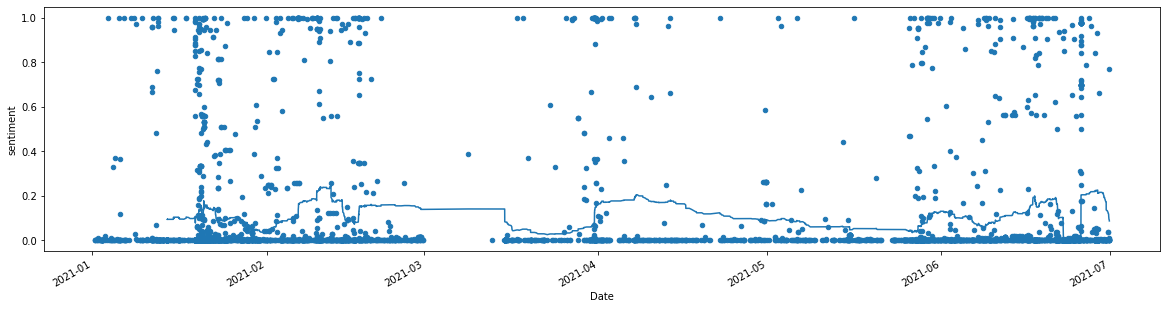

In [17]:
#origins_cleaned = origins_cleaned.sort_values(by = 'Date')

origins_vis = origins_cleaned.set_index('Date')

start_date = pd.to_datetime('2021-01-01').date()
end_date = pd.to_datetime('2021-07-01').date()
origins_vis = origins_vis.loc[start_date:end_date]

origins_vis.reset_index().plot.scatter(x = 'Date', y = 'sentiment', figsize = (20, 5))
origins_vis['sentiment'].rolling(window=200).mean().plot()

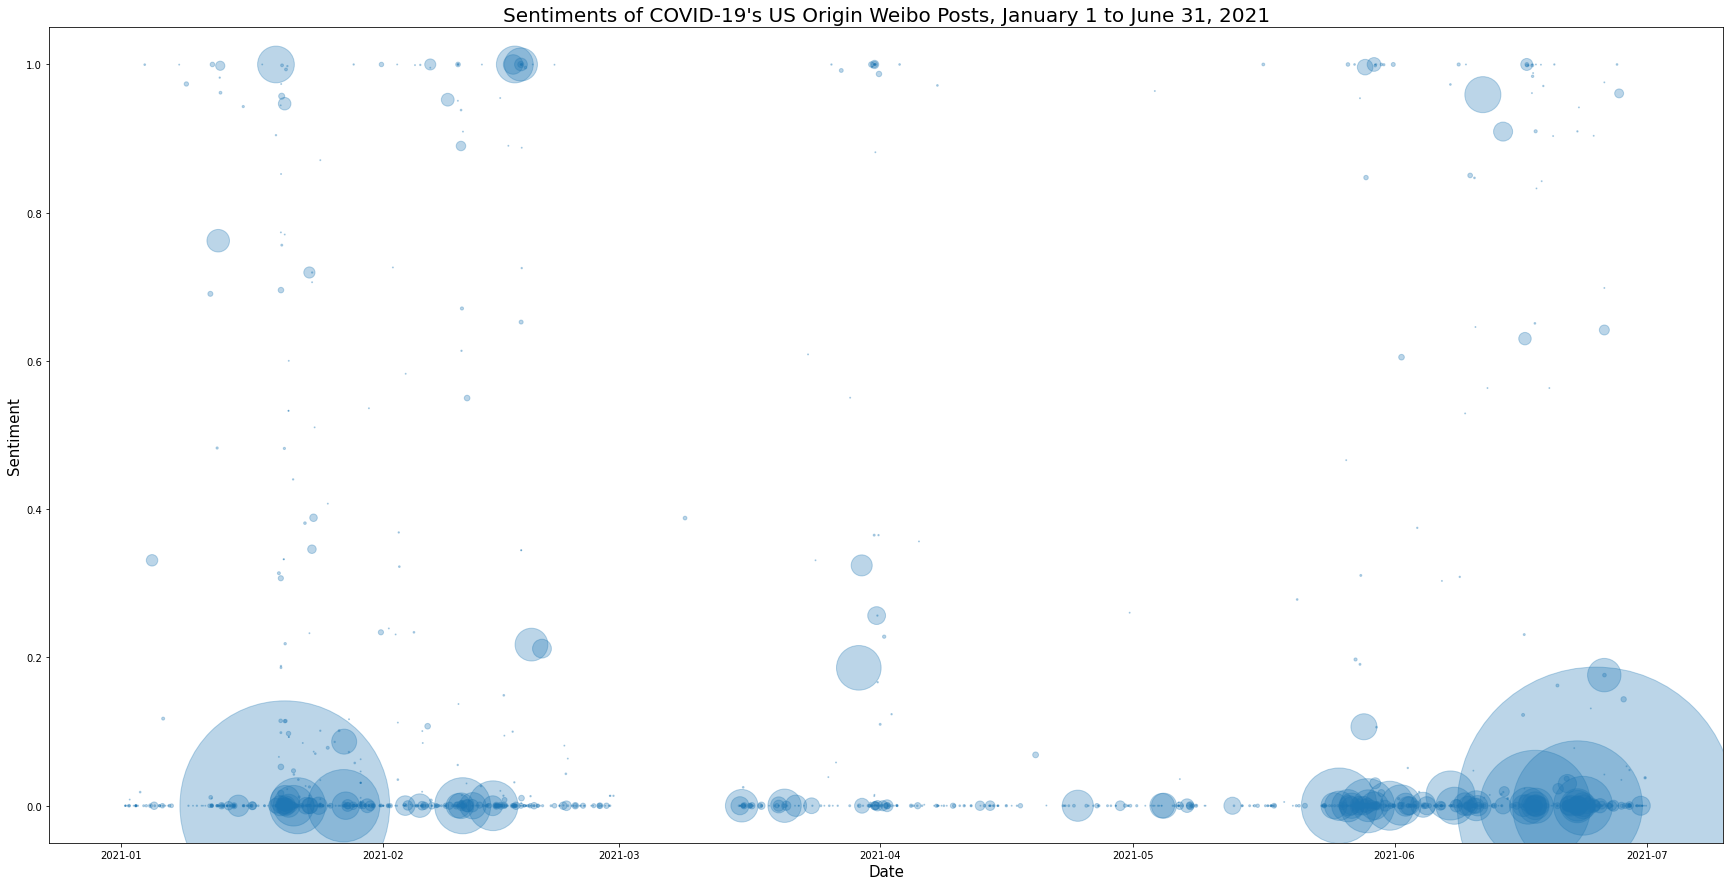

In [99]:
origins_x = origins_vis.reset_index()['Date']
origins_y = origins_vis['sentiment']
origins_size = origins_vis['Likes']

plt.figure(figsize = (30,15))
plt.scatter(origins_x, origins_y, s=origins_size, alpha=0.3)
plt.title("Sentiments of COVID-19's US Origin Weibo Posts, January 1 to June 31, 2021", fontsize=20)
plt.xlabel('Date', fontsize=15)
plt.ylabel('Sentiment', fontsize=15)
plt.show()

### New Unit 731

In [115]:
new_u731 = pd.read_excel('U731_and_sentiments.xlsx')

In [7]:
sentiment_column = []

for item in new_u731['Text']:
    s = SnowNLP(item)
    sentiment_column.append(s.sentiments)
    print(s.sentiments)
    
new_u731.loc[:,'sentiment'] = sentiment_column

3.097794705864132e-06
0.0
0.0
0.0
0.0
0.0
0.0
6.661338147750939e-16
2.4424906541753444e-15
0.0
0.0
0.0
0.0
0.31685589500727174
0.0
1.3322676295501878e-14
3.1086244689504383e-15
0.0
3.314313268276692e-10
0.0
0.0
0.00014530867752682308
1.3766765505351941e-14
0.0004154704581420532
8.75351725770912e-07
6.661338147750939e-16
1.6897868071463762e-07
6.661338147750939e-16
0.0
1.3766765505351941e-14
1.7763568394002505e-15
0.0
2.497973161652567e-09
0.0
0.0
0.0
0.0
0.0
0.001448214584526375
1.1102230246251565e-15
0.0
0.0
0.00010421955381501036
0.5246526376197899
5.695666160931978e-12
1.156363893528578e-11
1.4539982773342786e-08
0.0
0.0
0.0
0.0
0.0
8.881784197001252e-16
1.3766765505351941e-14
4.8627768478581856e-14
3.1086244689504383e-15
0.0
0.00012387486103715428
0.000176267382928752
0.0
0.0
1.7978352140346487e-10
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
2.379764163285003e-06
0.0
1.7763568394002505e-14
4.884981308350689e-15
0.0
0.0
0.002774042905773877
0.0
5.720364782746401e-06
0.0
0.0
0.0
9.79708456583239

0.0
0.0
0.0
0.0
0.0
1.1103118424671266e-11
0.0
0.0
3.133049375492192e-13
0.0
2.1683150241980087e-07
0.0
0.0
1.1082575868126554e-07
0.0
0.0
2.7000179869673957e-11
0.0
1.1989535697587428e-08
0.0034256205046335753
1.2434497875801753e-14
9.946043988406927e-12
5.584662921664929e-06
1.1458982124290529e-06
1.2434497875801753e-14
1.8614481178680364e-08
1.0
2.2848768177485823e-06
0.0
0.0
0.0011578442435062897
0.0
2.4442471757701867e-07
0.0
6.353388470881072e-07
6.336915436833124e-10
0.0
0.0
2.220446049250313e-16
0.0
1.254685342289008e-07
9.794971387311335e-07
0.00824322366156982
0.0
2.0841407721849947e-07
0.0
5.329070518200751e-15
1.898086132712251e-10
8.529166262150056e-10
4.819614642936898e-07
4.702427873759518e-07
0.4452036713894316
0.0
5.2049752508054326e-08
0.9730150954718843
0.0
5.6333492715054945e-06
0.009629941754371374
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
3.314313268276692e-10
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0

0.0
6.418262976648492e-08
0.6972177737601658
0.0
0.0
6.481104319888686e-09
0.0
0.0
1.0378364834195963e-12
0.0
9.722720214355718e-05
5.360156762890256e-13
1.156363893528578e-11
5.317732841592093e-05
0.0
1.4202417020214853e-11
8.813616503289268e-12
3.2900863777829414e-07
0.0
0.00023145966334681134
0.0
6.661338147750939e-16
5.3555826440288e-11
1.2997602993891633e-11
1.156363893528578e-11
4.034911960104637e-09
6.481104319888686e-09
0.0
0.15717998047617687
6.481104319888686e-09
0.0
3.256284131225584e-12
0.0
0.0
0.0
0.0
0.0
0.0
0.0
6.661338147750939e-16
0.0
1.5543122344752192e-15
1.5543122344752192e-15
0.0
3.224771159882067e-06
3.552713678800501e-15
0.0
1.934197922892622e-05
0.0
6.640495366916355e-07
8.691385116055272e-07
2.36126683761384e-08
4.350543260756012e-06
0.9999147795838139
0.9817745790227856
0.0
6.642792982347601e-10
0.0


In [9]:
new_u731.to_excel('U731_and_sentiments.xlsx')

In [8]:
new_u731['sentiment'].mean()

0.03569441791502744

In [63]:
new_u731_good_sentiment = new_u731.loc[new_u731['sentiment'] > 0.5]
new_u731_good_sentiment

,Text,Date,Likes,Author,Shares,sentiment
43,回复羿雯Pandra:西班牙大流感就来自美国羿雯Pandra:感觉美国🇺🇸大号流感就是新冠肺...,2021-01-22 12:09:00,4,小朱观地球|@小朱观地球,1,0.524653
90,今天河北综合广播《全省新闻联播》内容提要1、阿拉伯国家驻华使节赴西柏坡和正定参加中共党史主题...,2021-06-04 20:06:00,1,河北综合广播,1,1.000000
131,叹为观止！林岳芳:唯一的不同之处，当年那些被日寇拿来做试验的马路大们，没有拿到钱。而当下英国...,2021-02-18 13:06:00,0,我tm就爱护着我家兔子咋滴了|@新浪军事,1,0.917448
168,赵立坚：德堡与“731部队”联系千丝万缕。731部队负责人曾是德特里克堡顾问 L中国日报的微...,2021-05-28 21:14:00,6,成都共青团,2,0.995759
191,小景观事热点 病毒溯源，必须『赵立坚：731部队负责人曾是德特里克堡生物武器顾问』赵立坚：7...,2021-05-29 00:10:00,1,枫景上饶,2,0.966493
238,听起来都是试验品的意思。林岳芳:唯一的不同之处，当年那些被日寇拿来做试验的马路大们，没有拿到...,2021-02-18 13:06:00,2,嘉善老顾|@新浪军事,3,0.531324
250,微博揭秘德特里克堡 继承“731部队”遗产的美国德特里克堡生物实验室，都泄露过哪些病毒？微博...,2021-01-22 12:09:00,3,厚恩投资张延昆|@小朱观地球,4,0.610035
331,唯一的不同之处，当年那些被日寇拿来做试验的马路大们，没有拿到钱。而当下英国拿来试验的马路大们...,2021-02-18 13:06:00,5,林岳芳|@新浪军事,9,0.740855
332,英国要用健康人故意感染新冠病毒，731部队再现？花式过冬指南微博健康讲堂健康过大年曾医生粉丝...,2021-02-21 11:15:00,119,普外科曾医生,10,0.998253
350,外交部将新冠肺炎溯源指向美军生物武器实验室德特里克堡，终于到了还中国人民以及武汉人民一个清白...,2021-01-20 07:51:00,29,数码零零七,13,0.705151


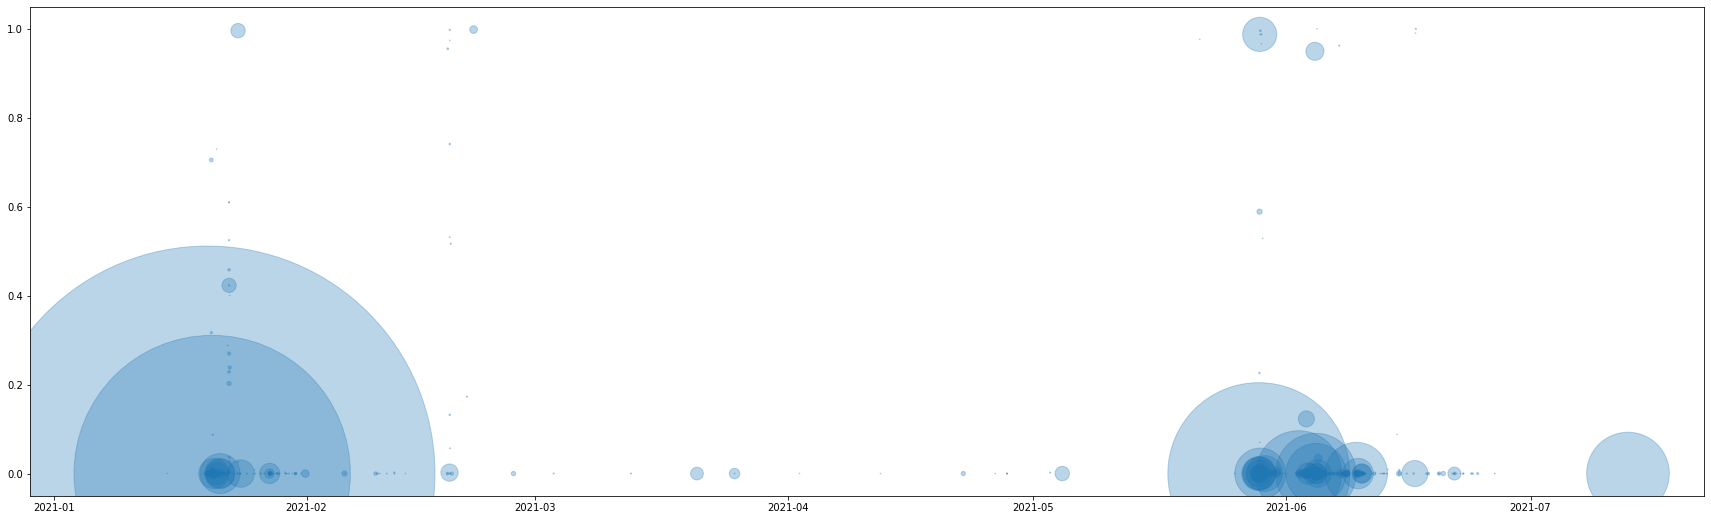

In [103]:
u731_x = new_u731['Date']
u731_y = new_u731['sentiment']
u731_size = new_u731['Likes']/2

plt.figure(figsize = (30,9))
plt.scatter(u731_x, u731_y, s=u731_size, alpha=0.3)
plt.show()

##### Another Sample

In [152]:
new_u731_2 = origins_cleaned[origins_cleaned['Text'].str.contains("731")]

In [153]:
new_u731_2_good_sentiment = new_u731_2.loc[new_u731_2['sentiment'] > 0.04]
new_u731_2_good_sentiment 

,Unnamed: 0,Text,Date,Likes,Author,Shares,sentiment,avg
825,873,军武次位面等多个自媒体，称美国德特里克堡实验室是新冠病毒源头 依据是一段自称曾在德特里克堡工...,2021-01-23 14:27:00,73,云财经|@军武次位面,16,0.346067,0.126931
1387,1455,新冠源头已找到？美国生化实验室曝光，技术竟来自日本731部队？ ​,2021-02-09 23:35:00,0,甜美生活smile,0,0.088911,0.128571
2266,2349,邀请码7316610，突发！俄罗斯高官突爆猛料！新冠病毒源头已经找到，源自美国实... ​,2021-04-30 14:01:00,1,用户7488131236,0,0.260411,0.098947
3205,3313,《新冠源头已现身？美国德特里克堡罪恶难掩，前身竟是731部队？》 O新冠源头已现身？美国德特...,2021-06-18 15:28:00,2,风语智者739,1,0.970968,0.126934


In [154]:
new_u731_2['sentiment'].mean()

0.020017203183034155

### New FD

In [150]:
new_fd = origins_cleaned[origins_cleaned['Text'].str.contains("德特里克")]
new_fd

,Unnamed: 0,Text,Date,Likes,Author,Shares,sentiment,avg
0,0,6月15日美国方面仍未对许多可疑行为作出澄清和解释，包括美国一些在疫情之前被认为死于流感的人...,2018-01-01 23:18:00,3,千年老人2016|@千年老人2016,0,0.000075,NaN
95,106,美国德特里克堡病毒一个院长的思考:从国内无数次境外冷链传播病毒的情况看，武汉去年年初爆发的新...,2021-01-11 13:23:00,0,72mama|@新华社,0,0.666868,NaN
154,165,做为转基因伪科学的发源地，美国是新冠疫情的逻辑源头，奥巴马拜登时期，联邦强行立项，诱变旧冠病...,2021-01-13 03:39:00,0,alan8616|@alan8616,5,0.000000,NaN
155,166,世卫组织确定考察对象，伪科学方式，侮辱中华民族，全体人类包括美国人民的智慧。alan8616...,2021-01-13 03:39:00,2,alan8616|@alan8616,4,0.000000,NaN
156,167,中国人民不欢迎伪科学考察调查美国，才能帮助美国人民找到源头，采取科学措施，全面禁转，科学抗疫...,2021-01-13 03:39:00,2,alan8616,19,0.000000,NaN
...,...,...,...,...,...,...,...,...
4043,4158,环时深度：美国德特里克堡，到底在隐藏什么？“在（新冠病毒）溯源问题上，美方没有资格对中方进行...,2021-06-30 19:25:00,0,云南网,0,0.000000,0.087872
4044,4159,[环时深度]美国德特里克堡，到底在隐藏什么？“在（新冠病毒）溯源问题上，美方没有资格对中方进...,2021-06-30 19:28:00,0,金山网,0,0.000000,0.087872
4047,4162,能测空气中新冠病毒的口罩或面世 环时深度丨美国德特里克堡，到底在隐藏什么？“在（新冠病毒）溯...,2021-06-30 19:52:00,1,闻所未文,1,0.000000,0.089288
4051,4166,德特里克堡，到底在隐藏什么？“在（新冠病毒）溯源问题上，美方没有资格对中方进行讹诈和胁迫，也...,2021-06-30 22:08:00,0,海拔资讯,0,0.000000,0.089302


In [156]:
new_fd['sentiment'].mean()

0.05651742823093962

In [157]:
new_fd.to_excel('origins_fd.xlsx')

### Sentiment histogram visualizations

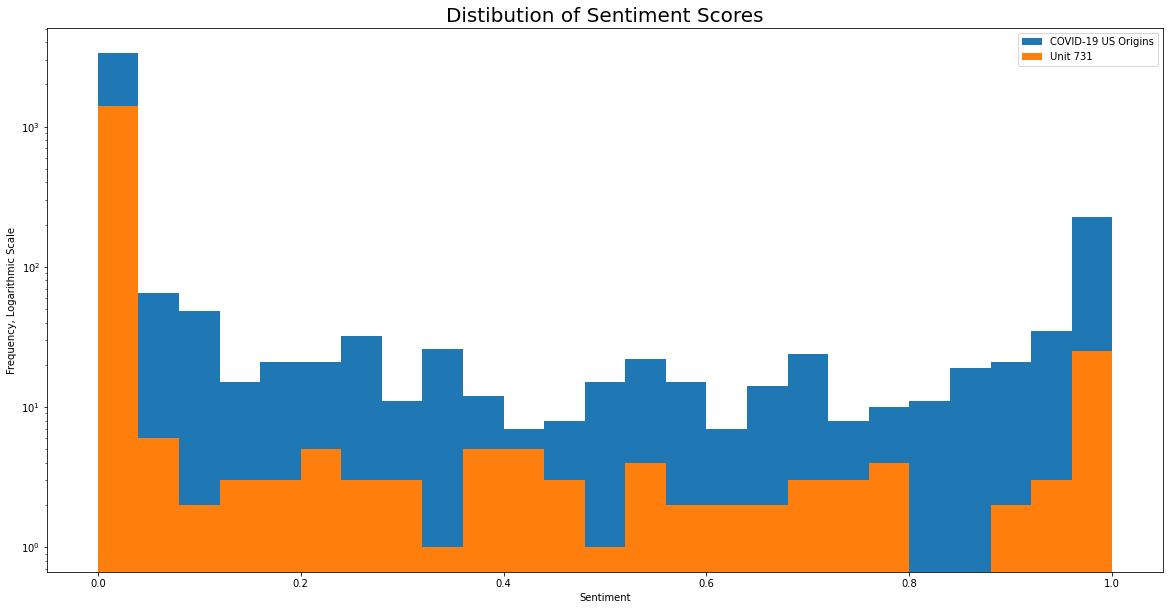

In [189]:
nbins = 25

plt.figure(figsize = (20,10))
plt.hist(origins_cleaned['sentiment'], bins = nbins, label = 'COVID-19 US Origins')
plt.hist(new_u731['sentiment'], bins = nbins, label = 'Unit 731')
plt.yscale('log')

plt.title('Distibution of Sentiment Scores', fontsize = 20)
plt.xlabel('Sentiment')
plt.ylabel('Frequency, Logarithmic Scale')
plt.legend()
plt.show()

### Rolling avg visualizations

In [130]:
origins_cleaned.loc[:,'avg'] = origins_cleaned['sentiment'].rolling(window=550).mean()

In [143]:
new_u731 = new_u731.sort_values(by='Date')
new_u731.loc[:,'avg'] = new_u731['sentiment'].rolling(window=150).mean()

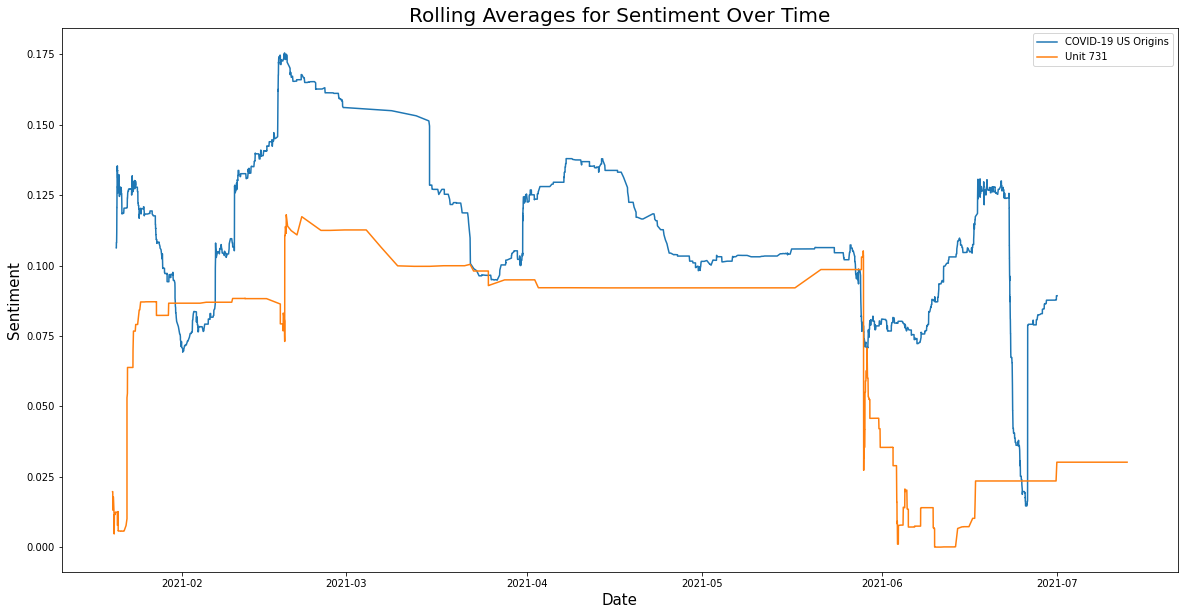

In [146]:
plt.figure(figsize = (20,10))

plt.title('Rolling Averages for Sentiment Over Time', fontsize = 20)
plt.xlabel('Date', fontsize = 15)
plt.ylabel('Sentiment', fontsize = 15)

plt.plot(origins_cleaned['Date'], origins_cleaned['avg'], label = 'COVID-19 US Origins')
plt.plot(new_u731['Date'], new_u731['avg'], label = 'Unit 731')
plt.legend()

plt.show()

### Origin Narratives in February

In [192]:
origin_feb = pd.read_excel('Weibo_Origins_Feb.xlsx')
origin_feb.head()

,Text,Date,Likes,Author,Shares
0,2011年有一部美国电影Cntagin传染病，描述了一种蝙蝠为源头，混合基因的病毒从中国开始...,2020-02-01 05:53:00,3,朴素医生,0
1,新型冠状病毒武汉加油埃博拉“我们必须停止在病毒爆发后才做出应对方案，相反我们应该未雨绸缪”刚...,2020-02-02 23:32:00,23,哪块小饼干zzz,4
2,前些时候美国爆发了大流感，死亡人数已达8200人。但美国疫情透明度高，所以美国人没有恐慌情绪...,2020-02-03 13:03:00,2,木东老者,0
3,2019年10月军运会在武汉举办2019年10月美国军运代表团入住华南海鲜市场附近酒店美国“...,2020-02-08 03:45:00,40,裕之ZR,2
4,今时今日，中国新冠肺炎疫情确诊4万多例，美国乙型脑炎流感感染1500万人，死亡1万余人，非洲...,2020-02-10 13:29:00,0,用户oxmb72w7lc,0


In [193]:
sentiment_column = []

for item in origin_feb['Text']:
    s = SnowNLP(item)
    sentiment_column.append(s.sentiments)
    print(s.sentiments)
    
origin_feb.loc[:,'sentiment'] = sentiment_column

0.003263564595729518
0.0
0.0
1.1284523961485604e-05
2.220446049250313e-16
4.5541610593780035e-08
0.9534951333379844
5.3389224102806665e-06
0.0007186005257625583
0.0
0.0
2.9330826656348563e-09
0.0
0.20877110551740607
0.0
0.0
1.4521717162097048e-13
0.0
0.0
0.0
0.0038776812933261073
6.880883188786768e-07
0.9998024892717832
0.0
0.015220322274652087
0.0
0.0
0.4340973818129491
0.9964953081270648
0.0
0.0
0.0
0.0
0.0
0.29142739044198307
0.002987284256670164
1.5920598173124745e-13
1.5533125063971198e-07
2.1650122877803213e-06
6.294370074488853e-05
4.091563949970567e-05
0.22653306328469458
6.9011630159376836e-06
6.9011630159376836e-06
0.41941637888319516
0.11007903732063729
7.016609515630989e-14
7.016609515630989e-14
7.016609515630989e-14
0.7965679516744034
0.7965679516744034
0.7965679516744034
0.7965679516744034
4.9718192074887924e-05
2.2436152583571456e-06
0.0003045792742399911
2.2032206005162536e-06
1.5207390902105544e-11
0.0
0.0
3.3306690738754696e-15
0.00016954397745216898
0.918001577583623

0.25315942669288116
0.0006434099620640232
3.838969142577753e-10
1.1653342097406316e-05
0.23590964795472424
0.032876956372512534
0.1901190640561944
8.031926149609792e-05
1.1966412370778556e-05
0.0
0.20580971268814907
0.10688318206308423
0.00011453209485812188
0.054795185137683
0.05541200480394015
0.07561515367609462
0.009982512795477794
3.8131384403228274e-05
0.2227371006501152
0.0
0.03683819017136092
0.02016171604037753
0.002214751713223384
0.25315942669288116
2.3157031847631515e-12
6.147894899832806e-07
0.054795185137683
0.07513363659443717
0.25315942669288116
0.022092788933541718
0.009316214317361737
0.1194369197501215
0.25315942669288116
0.0
0.0014507878350181747
0.25315942669288116
7.335594170043702e-05
3.5451960234134106e-07
0.0
0.07561515367609462
0.0
0.00013410135346825225
0.0
6.1921377049189985e-06
0.08513097100103717
1.7726163326070576e-07
0.0632138983434204
7.808197749448187e-05
0.25315942669288116
0.11801529690581769
0.019152676985729533
0.142207078818531
0.01331923851168193

In [212]:
sentiment_column = []

for item in smoa_feb['Text']:
    s = SnowNLP(item)
    sentiment_column.append(s.sentiments)
    print(s.sentiments)
    
smoa_feb.loc[:,'sentiment'] = sentiment_column

0.0
9.338085860122192e-12
0.05334507124881227
0.8007415093952631
4.1043528575812616e-09
2.7000623958883807e-13
0.00015903533435268624
0.054079966085423314
4.752515371353461e-06
0.001711692346386684
1.7541523789077473e-14
1.8291951855098354e-05
4.541659615053817e-08
2.010111247230384e-06
0.0
0.0
5.937479568784987e-06
0.0
0.0
0.0
0.00013015254516413055
0.0
4.538116674668302e-07
2.6756841187136615e-10
0.0
0.0002211798318924041
0.0
0.0
1.1108258590741826e-07
0.9402102788459085
0.0
0.0
0.0
1.754551633981194e-07
5.099424653653983e-07
0.2030095784454955
0.0
0.7557631998591416
0.0
0.0
5.762500391870429e-05
0.24311060632515347
0.0
0.01865453706330611
3.333073150812993e-09
9.769917430624275e-09
3.0391362759729645e-09
3.504127599196494e-08
8.28350732451355e-08
1.5641403727784109e-09
0.003400321206409207
0.30939521071717513
0.4126999191449684
0.0
0.9929813766109445
6.341512693053275e-05
0.0006686074552403332
4.599155422058132e-07
5.185394336137961e-10
8.881784197001252e-16
1.8198775819655566e-12
3

0.0
3.2860403287315876e-10
0.9078535657939416
0.15071478970431784
3.323734846238935e-07
0.9959336750512555
0.9101457665380505
0.006594844239689146
4.0810282553316313e-07
0.7733797186463996
0.7732321349743498
0.35210956996720233
0.0
5.24037221250051e-06
0.0
0.000941824546841219
0.02371956929997232
5.962483884403014e-08
0.14253344695928727
0.00011134485136343741
5.260014646069067e-12
1.0791367799356522e-13
0.14253344695928727
1.7766588636947134e-06
3.8990605089050945e-06
6.587558344373079e-07
5.579577504222222e-05
0.001195822728479845
4.445566137434298e-09
0.03694648485867813
3.3579805602812485e-12
0.0
0.00011361636816775711
0.0316046604149286
0.0
0.014795307392825197
2.4950264077006068e-11
0.27761678735368667
0.024868499004946476
0.14253344695928727
0.14253344695928727
0.7072369450254875
0.014455502184081537
6.988631895410435e-12
0.0
0.7509307493325702
0.14253344695928727
6.73034185594279e-05
0.0
0.0
6.73034185594279e-05
0.0004180256465798893
0.0
3.7156379775193926e-06
0.013664770020400

7.081462083391443e-10
3.6621838894745906e-10
7.081462083391443e-10
0.12693338728179782
3.594795572325893e-10
7.081462083391443e-10
7.081462083391443e-10
1.2732037646401295e-12
1.268395302600478e-05
5.131450819817474e-13
0.002204113347553105
7.081462083391443e-10
8.881784197001252e-16
7.081462083391443e-10
8.748557434046234e-14
1.794786541609028e-12
2.2144508449173372e-11
1.7763568394002505e-15
9.37066868544889e-10
3.594795572325893e-10
7.882688369820201e-07
0.004332665103636835
0.00018920490581630922
3.92863532825416e-05
0.0024324502221392263
3.5205172110863714e-12
0.008877630061461694
2.135402965564026e-12
0.0005324672103473871
0.004348547836164451
1.2769791288835819e-06
4.056827984655342e-09
6.641354133307686e-13
0.0006356688373576613
0.0016197308411890488
0.0012514453445242602
0.0016197308411890488
5.064315540337372e-05
0.0016197308411890488
0.0013316119963043827
2.7620017391205565e-05
0.0016197308411890488
0.0016197308411890488
0.0003859442405172997
0.0016197308411890488
0.00161973

9.243494858424128e-12
0.0031998312623590097
0.0
2.220446049250313e-16
1.153581384427671e-05
3.537240134132702e-08
0.0
4.285460875053104e-14
2.379976390742833e-06
2.3543167415596145e-11
0.0
0.02965214284301354
1.0603279032572743e-08
0.0
0.0
2.220446049250313e-16
0.0004038038652682818
7.486961016711646e-07
3.4069191912067254e-11
0.0
1.074178967996886e-07
0.0
0.0
0.6630418938006034
0.0
0.0001978812336898006
3.537240134132702e-08
0.0
5.431100047470494e-08
9.990398659454058e-07
0.9464929876710043
1.0534375248227867e-05
0.001297132578047644
0.0015000515802745529
0.0
0.0
0.0036885874624482673
0.0
0.00017874309846999115
0.01099406168777406
0.0
0.30372523919399563
0.0
0.0010192829458173236
4.1784660431698484e-07
0.0
1.472027166826706e-09
0.15445852557370943
5.307355477324194e-08
0.003966655739444658


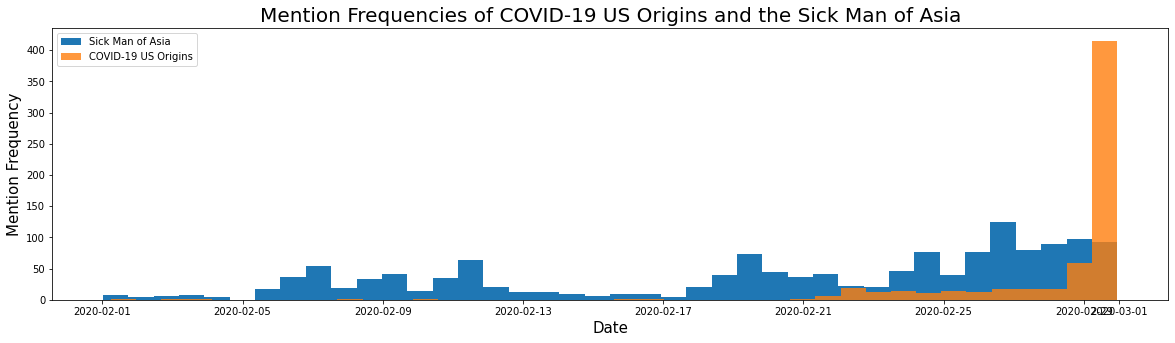

In [234]:
plt.figure(figsize = (20, 5))

plt.title('Mention Frequencies of COVID-19 US Origins and the Sick Man of Asia', fontsize = 20)

plt.hist(smoa_feb['Date'], bins = 40, label = 'Sick Man of Asia')
plt.hist(origin_feb['Date'], bins = 40, alpha = 0.8, label = 'COVID-19 US Origins')
plt.xlabel('Date', fontsize = 15)
plt.ylabel('Mention Frequency', fontsize = 15)
#plt.locator_params(axis = 'x', nbins = 5)

plt.legend()
plt.show()

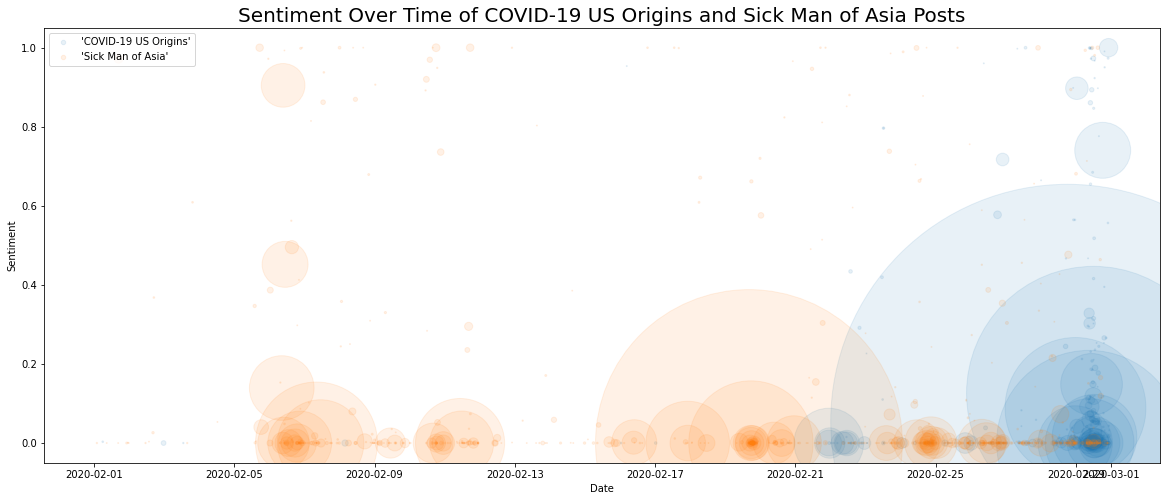

In [226]:
plt.figure(figsize = (20, 8))

plt.title('Sentiment Over Time of COVID-19 US Origins and Sick Man of Asia Posts', fontsize = 20)

plt.scatter(origin_feb['Date'], origin_feb['sentiment'], s = origin_feb['Likes'], alpha = 0.1,
           label = "'COVID-19 US Origins'")
plt.scatter(smoa_feb['Date'], smoa_feb['sentiment'], s = smoa_feb['Likes'], alpha = 0.1,
           label = "'Sick Man of Asia'")
plt.xlabel('Date')
plt.ylabel('Sentiment')

lgnd = plt.legend(loc = 'upper left')
lgnd.legendHandles[0]._sizes = [20]
lgnd.legendHandles[1]._sizes = [20]
plt.show()

In [218]:
origin_feb.loc[:,'avg'] = origin_feb['sentiment'].rolling(window=50).mean()
smoa_feb.loc[:,'avg'] = smoa_feb['sentiment'].rolling(window=70).mean()

# Non-Parametric Tests

In [127]:
from scipy.stats import mannwhitneyu

### Origins cleaned vs Unit 731 Mann-Whitney U

In [129]:
print(new_u731['sentiment'].mean())
print(new_u731['sentiment'].std())

0.03569441791502744
0.16183094814500437


In [18]:
print(origins_cleaned['sentiment'].mean())
print(origins_cleaned['sentiment'].std())

0.1057742691566018
0.2753298446203646


In [135]:
stat, p = mannwhitneyu(new_u731['sentiment'], origins_cleaned['sentiment'], alternative = 'less')
print(stat)
print(p)

2156500.5
2.941608058474824e-68


### FD cleaned vs Unit 731 Mann-Whitney U

In [136]:
stat, p = mannwhitneyu(new_u731['sentiment'], new_fd['sentiment'], alternative = 'less')
print(stat)
print(p)

804901.5
4.486680270331398e-09
